In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from skimage import data, io, filters, feature, morphology
from skimage.morphology import square, disk
from scipy import ndimage as ndi

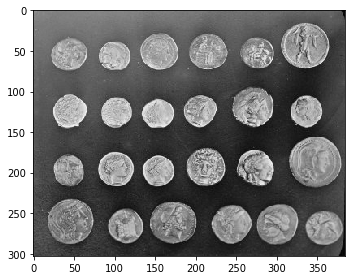

In [4]:
image = data.coins()
io.imshow(image)
io.show()

# Filtrado pasa alta
Los bordes son cambios bruscos de intensidades en pixeles cercanos, por tanto correcponden a componentes de alta frecuencia. Con los filtros sobel y prewitt logramos filtrar las componentes de baja frecuencia.


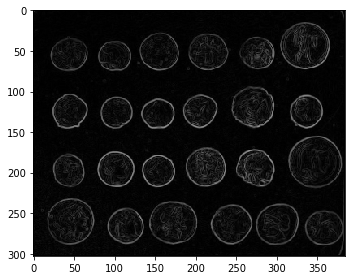

In [5]:
imsobel = filters.sobel(image)
io.imshow(imsobel)
io.show()

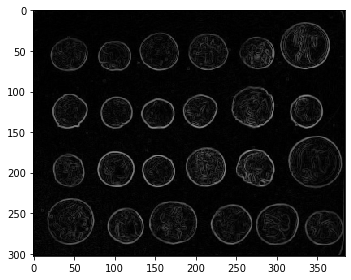

In [7]:
imprewitt = filters.prewitt(image)
io.imshow(imprewitt)
io.show()

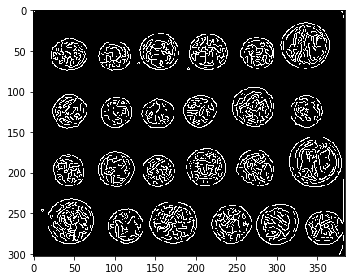

In [9]:
imcanny = feature.canny(image)
io.imshow(imcanny)
io.show()

# Segmentación
Una vez hemos filtrado los bordes realizaremos la segementación.



1.   Binarezaremos la iamgen


> Aplicamos un umbral al histograma de la imagen


2.   Elemento de list



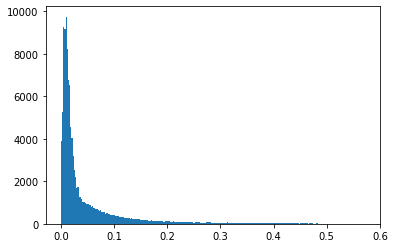

In [14]:
plt.hist(imprewitt.flatten(), bins=256)
plt.show()

Umbral: 0.05


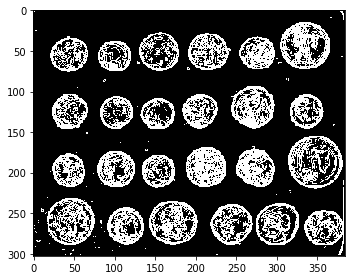

In [26]:
umbral = 0.05 # Umbral manual

# Umbral de forma automatica con la tecnica de otso
# umbral = filters.threshold_otsu(imprewitt)
print('Umbral:',umbral)
binarizacion = imprewitt > umbral
io.imshow(binarizacion)
io.show()

# Operadores morfológicos: Dilatación y erosion

* Dilatación: aumentar el negro.

* Erosión: aumentar el blanco.

Text(0.5, 1.0, 'Imagen original')

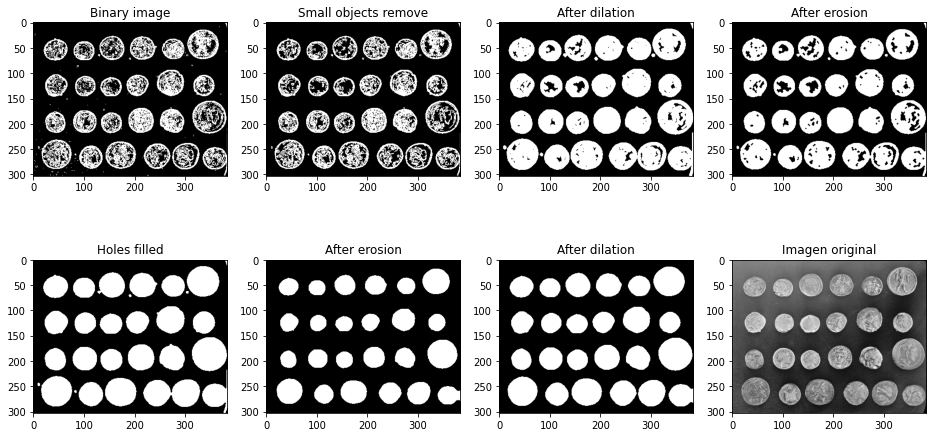

In [32]:
im0 = morphology.remove_small_objects(binarizacion, 9)
im1 = morphology.dilation(image=im0, selem=disk(2))
im2 = morphology.erosion(image=im1, selem=disk(1))
im3 = ndi.binary_fill_holes(im2)
im4 = morphology.erosion(image=im3, selem=disk(5))
im5 = morphology.dilation(image=im4, selem=disk(4))

f, axes = plt.subplots(2, 4, figsize=(16, 8))
axes[0, 0].imshow(binarizacion, cmap='gray', aspect='equal')
axes[0, 0].set_title('Binary image')
axes[0, 1].imshow(im0, cmap='gray', aspect='equal')
axes[0, 1].set_title('Small objects remove')
axes[0, 2].imshow(im1, cmap='gray', aspect='equal')
axes[0, 2].set_title('After dilation')
axes[0, 3].imshow(im2, cmap='gray', aspect='equal')
axes[0, 3].set_title('After erosion')
axes[1, 0].imshow(im3, cmap='gray', aspect='equal')
axes[1, 0].set_title('Holes filled')
axes[1, 1].imshow(im4, cmap='gray', aspect='equal')
axes[1, 1].set_title('After erosion')
axes[1, 2].imshow(im5, cmap='gray', aspect='equal')
axes[1, 2].set_title('After dilation')
axes[1, 3].imshow(image, cmap='gray', aspect='equal')
axes[1, 3].set_title('Imagen original')

Las etapas dependen un poco de cada filtro o umbral. Se van introduciendo en función de los artefactos que van quedando, conforme vamos aplicando filtros.